<a href="https://colab.research.google.com/github/utk468/faceemotions-deeplearning-/blob/main/face_expression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import kagglehub
msambare_fer2013_path = kagglehub.dataset_download('msambare/fer2013')

print('Data source import complete.')


In [ ]:
import kagglehub


path = kagglehub.dataset_download("msambare/fer2013")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/fer2013


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16
from tensorflow.keras import Model
import os

In [ ]:
train_dir = "/kaggle/input/fer2013/train"
test_dir = "/kaggle/input/fer2013/test"


In [ ]:

train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

In [ ]:
test_datagen = ImageDataGenerator(
    rescale=1.0 / 255
)

In [ ]:

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode="categorical"
)


test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode="categorical"
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(7, activation='sigmoid')(x)


model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:

model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)


loss, accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy:.2f}")

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


898/898 ━━━━━━━━━━━━━━━━━━━━ 316s 332ms/step - accuracy: 0.2498 - loss: 1.7898 - val_accuracy: 0.4620 - val_loss: 1.4079
Epoch 2/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 180s 199ms/step - accuracy: 0.4719 - loss: 1.3735 - val_accuracy: 0.5674 - val_loss: 1.1260
Epoch 3/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 171s 189ms/step - accuracy: 0.5426 - loss: 1.1989 - val_accuracy: 0.5857 - val_loss: 1.0818
Epoch 4/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 177s 196ms/step - accuracy: 0.5834 - loss: 1.1037 - val_accuracy: 0.5931 - val_loss: 1.0652
Epoch 5/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 178s 196ms/step - accuracy: 0.6075 - loss: 1.0481 - val_accuracy: 0.6103 - val_loss: 1.0396
Epoch 6/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 180s 198ms/step - accuracy: 0.6189 - loss: 1.0085 - val_accuracy: 0.6312 - val_loss: 0.9708
Epoch 7/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 169s 187ms/step - accuracy: 0.6352 - loss: 0.9609 - val_accuracy: 0.6516 - val_loss: 0.9389
Epoch 8/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 170s 188ms/step - accuracy: 0.6543 - loss: 0.92

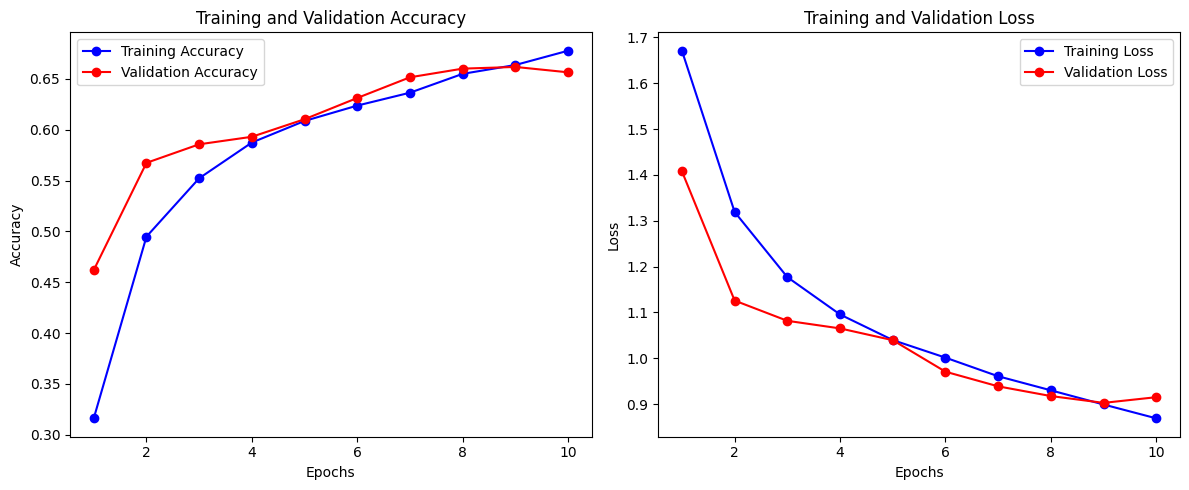

In [ ]:
import matplotlib.pyplot as plt


train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']


epochs = range(1, len(train_accuracy) + 1)


plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


plt.tight_layout()
plt.show()
